In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv('datasets/daily_houston_data.csv').dropna()

In [4]:
df.rain_tomorrow.value_counts()

0    5049
1    1525
Name: rain_tomorrow, dtype: int64

In [5]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [6]:
input_cols = [
                'precipitation',
                'temperature',
                # 'dewpoint_temperature',
                # 'relative_humidity',
                # 'cloud_cover',  
                # 'wind_speed'
]

In [7]:
x_train = train[input_cols]

y_train = train[['rain_tomorrow']]

In [8]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)

In [9]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)
x_train = x_train_resampled
y_train = y_train_resampled

y_train.value_counts()
x_val = validate[x_train.columns].copy()
y_val = validate[y_train.columns].copy()



In [10]:
x_test = test[input_cols]

y_test = test[['rain_tomorrow']]

In [11]:
model = KNeighborsClassifier() 
model.fit(x_train, y_train)

/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [12]:
pred = model.predict(x_test)

In [13]:
print('Training Accuracy: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Test Accuracy: {:.2f}'.format(model.score(x_test,y_test)*100))
print('Validate accuracy: {:.2f}'.format(model.score(x_val,y_val)*100))

Training Accuracy: 83.86
Test Accuracy: 61.37
Validate accuracy: 61.60


/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


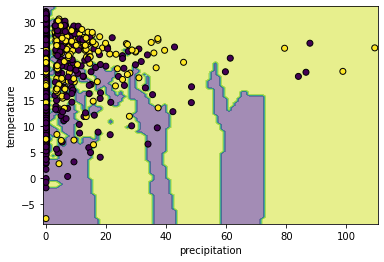

In [17]:
model2 = KNeighborsClassifier() 
model2.fit(x_train[['precipitation', 'temperature']], y_train)

from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
  model2, x_test[['precipitation', 'temperature']], response_method="predict",
  alpha=0.5,
  )

disp.ax_.scatter(x_test.to_numpy()[:, 0], x_test.to_numpy()[:, 1], c=y_test.to_numpy(), edgecolor="k")

plt.show()